## **1. Mount google drive**
---

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **2. Import the necessary libraries**
---

In [ ]:
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import os


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.2.0
numpy:       1.18.5
matplotlib:  3.2.2
sklearn:     0.22.2.post1


## **3.Create a function to plot the japanese character correctly**
---

In [ ]:
def grayplt(img,title=''):
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(img[:,:,0],cmap='gray',vmin=0,vmax=1)
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=1)
    plt.title(title, fontproperties=prop)
    plt.show()

print(grayplt)

<function grayplt at 0x7f7ad9358840>


## **4. Setup matplotlib**
---

In [ ]:
                                          # Setting up the font manager, so that
                                          # it can show japanese characters correctly
from matplotlib import font_manager as fm
fpath       = os.path.join(os.getcwd(), "ipam.ttf")
prop        = fm.FontProperties(fname=fpath)

plt.style.use('seaborn') 
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


## **5. Prepare data for training and testing**
---
* Step 1: Load the dataset 
* Step 2: Check the shape and type of the data, plot a sample for observation
* Step 3: Convert the data into float32 and rescale the values from the range of 0\~255 into 0\~1
* Step 4: Retrieve the row size and the column size of each image
* Step 5: Reshape training and testing data to be in the form of `[samples,rows,columns,channel]`. This is required by Keras framework
* Step 6: Perform one-hot enconding on the labels
* Step 7: Retrieve the number of classes in this problem

The shape of trDat is (60000, 28, 28) and the type of trDat is uint8
The shape of tsDat is (10000, 28, 28) and the type of tsDat is uint8

The shape of trLbl is (60000,) and the type of trLbl is uint8
The shape of tsLbl is (10000,) and the type of tsLbl is uint8



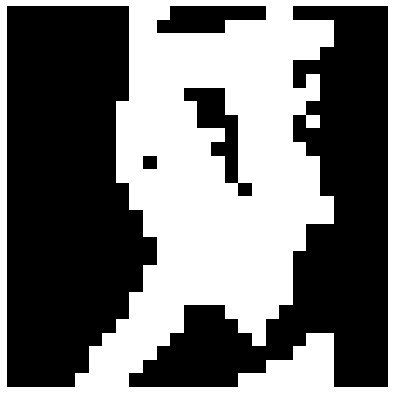

In [14]:
                                                                                # Step 1
trDat       = np.load('/content/gdrive/My Drive/technical/conda_repo/data/kmnist-train-imgs.npz')['arr_0']
trLbl       = np.load('/content/gdrive/My Drive/technical/conda_repo/data/kmnist-train-labels.npz')['arr_0']
tsDat       = np.load('/content/gdrive/My Drive/technical/conda_repo/data/kmnist-test-imgs.npz')['arr_0']
tsLbl       = np.load('/content/gdrive/My Drive/technical/conda_repo/data/kmnist-test-labels.npz')['arr_0']

                                                                                # Step 2
print("The shape of trDat is", trDat.shape, "and the type of trDat is", trDat.dtype)
print("The shape of tsDat is", tsDat.shape, "and the type of tsDat is", tsDat.dtype)
print("")
print("The shape of trLbl is", trLbl.shape, "and the type of trLbl is", trLbl.dtype)
print("The shape of tsLbl is", tsLbl.shape, "and the type of tsLbl is", tsLbl.dtype)
print("")
grayplt(trDat[132])

                                                                                # Step 3
trDat           = trDat.astype('float32')/255
tsDat           = tsDat.astype('float32')/255

                                                                                # Step 4
imgrows         = trDat.shape[1]
imgclms         = trDat.shape[2]

                                                                                # Step 5
trDat       = trDat.reshape(trDat.shape[0],
                            imgrows,
                            imgclms,
                            1)
tsDat       = tsDat.reshape(tsDat.shape[0],
                            imgrows,
                            imgclms,
                            1)

                                                                                # Step 6
trLbl           = to_categorical(trLbl)
tsLbl           = to_categorical(tsLbl)
                               
num_classes     = tsLbl.shape[1]                                                # Step 7

## **6. Define deep learning model (to be completed)**
___
* Step 1: Set a name for the coming model (required for saving)
* Step 2: Define the convolutional neural network model (to be completed)
* Step 3: Create models for training and testing
* Step 4: Display the summary of the model of interest 

In [20]:
modelname   = 'cnn'                                                          # Step 1

                                                                                # Step 2
def createModel():
    model = Sequential()
    model.add(Conv2D(20, (5,5), input_shape=(28,28,1), activation='relu'))
    # first conv layer 20 channels, kernel size 5 * 5
    # input 28 * 28 for 1 channel
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(40, (5,5), activation='relu'))
    # second conv layer 40 channels, kernel size 5 * 5
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    # size: 1* 640, input to the Neural Net
    model.add(Dense(128, activation='relu'))
    # hidden layter, size: 1 * 128
    model.add(Dense(num_classes, activation='softmax'))
    # output layer, size: 1* 10
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

                                                                                # Step 3
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()                                                                 # Step 4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

## **7. Create the callbacks to be applied during training**
---
* Step 1: Create a callback to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a callback to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two callbacks objects into a list

In [21]:
                                                                                # Step 1
folderpath      = '/content/gdrive/My Drive/technical/conda_repo/models/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: /content/gdrive/My Drive/technical/conda_repo/models/cnn.hdf5
Path to log:   /content/gdrive/My Drive/technical/conda_repo/models/cnn.csv


## **8. Train the deep learning model**
___

In [22]:
model.fit(trDat,                            # Training data
          trLbl,                            # Training label
          validation_data=(tsDat, tsLbl),   # Validation data and label
          epochs=60,                       # The amount of epochs to be trained
          batch_size=128,                   
          shuffle=True,                     # To shuffle the training data
          callbacks=callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/60
469/469 [==============================] - 4s 9ms/step - loss: 0.4457 - accuracy: 0.8601 - val_loss: 0.4137 - val_accuracy: 0.8738
Epoch 2/60
469/469 [==============================] - 4s 9ms/step - loss: 0.1501 - accuracy: 0.9543 - val_loss: 0.2994 - val_accuracy: 0.9119
Epoch 3/60
469/469 [==============================] - 4s 9ms/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 0.2474 - val_accuracy: 0.9304
Epoch 4/60
469/469 [==============================] - 4s 10ms/step - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.2182 - val_accuracy: 0.9410
Epoch 5/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.2130 - val_accuracy: 0.9437
Epoch 6/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.1886 - val_accuracy: 0.9510
Epoch 7/60
469/469 [==============================] - 4s 9ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.2055 - val_accuracy: 0.9465
Epoch

## **9. Validate the deep learning model**
---
* Step 1: Load the trained weights and compile the model
* Step 2: Make prediction


In [23]:
                                                                                # Step 1
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

predicts    = modelGo.predict(tsDat)                                            # Step 2
print("Prediction completes.")

Prediction completes.


## **10. Report classification metrics**
---
* Step 1: Setup the label
* Step 2: Convert label from one-hot to integer
* Step 3: Calculate the accuracy score
* Step 4: Generate classification report

In [24]:
                                                                                # Step 1
labelname   = ['お O','き Ki','す Su','つ Tsu','な Na','は Ha','ま Ma','や Ya','れ Re','を Wo']
                                                                                # Step 2
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 96.63%
              precision    recall  f1-score   support

         お O     0.9635    0.9770    0.9702      1000
        き Ki     0.9676    0.9570    0.9623      1000
        す Su     0.9532    0.9370    0.9450      1000
       つ Tsu     0.9629    0.9850    0.9738      1000
        な Na     0.9552    0.9600    0.9576      1000
        は Ha     0.9795    0.9550    0.9671      1000
        ま Ma     0.9524    0.9810    0.9665      1000
        や Ya     0.9827    0.9660    0.9743      1000
        れ Re     0.9683    0.9790    0.9736      1000
        を Wo     0.9787    0.9660    0.9723      1000

    accuracy                         0.9663     10000
   macro avg     0.9664    0.9663    0.9663     10000
weighted avg     0.9664    0.9663    0.9663     10000



## **11. Print confusion matrix**
---

In [25]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[977   2   0   0  13   2   0   5   1   0]
 [  3 957   6   0   2   2  18   1   7   4]
 [  8   3 937  18  12   2  12   2   4   2]
 [  0   0   5 985   1   4   5   0   0   0]
 [ 10   3   2   5 960   4   0   4   7   5]
 [  1   7  13   6   0 955   8   0   5   5]
 [  1   4   3   3   1   3 981   3   0   1]
 [  7   8   1   1   5   2   4 966   3   3]
 [  2   3   3   4   6   1   0   1 979   1]
 [  5   2  13   1   5   0   2   1   5 966]]


## **12. Plot curves on validation loss and accuracy**
---

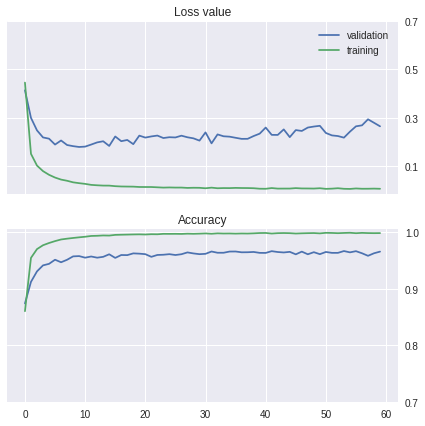

In [26]:
records     = pd.read_csv(folderpath+modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'], label="validation")
plt.plot(records['loss'],label="training")
plt.yticks([0.10,0.30,0.50,0.70])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])

plt.subplot(212)
plt.plot(records['val_accuracy'],label="validation")
plt.plot(records['accuracy'],label="training")
plt.yticks([0.7,0.8,0.9,1.0])
plt.title('Accuracy',fontsize=12)
ax.legend()
plt.show()

## **13. Save the model plot**
---

Path to plot: /content/gdrive/My Drive/technical/conda_repo/models/cnn_plot.png


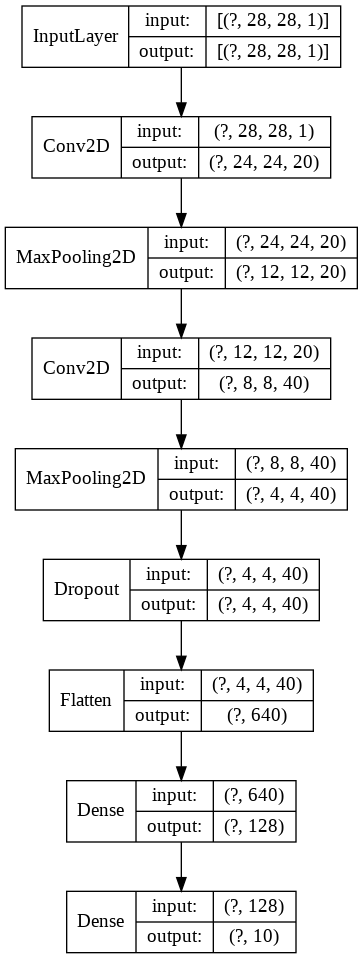

In [28]:
plotpath  = folderpath+modelname+'_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)
from IPython.display import Image
Image(filename=plotpath) 